<a href="https://colab.research.google.com/github/DinurakshanRavichandran/Visio-Glance/blob/XAI/cnn1_model(1)_with_LIME.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

from tensorflow.keras.models import load_model

model_path = '/content/drive/My Drive/cnn1_model_(1).h5'
try:
    model = load_model(model_path)
    print("Model loaded successfully from:", model_path)
except Exception as e:
    print("Error loading model:", e)

Mounted at /content/drive


Model loaded successfully from: /content/drive/My Drive/cnn1_model_(1).h5


In [2]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 224, 224, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 224, 224, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 112, 112, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 28, 28, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,704,902 (6.50 MB)

 Trainable params: 1,702,916 (6.50 MB)

 Non-trainable params: 1,984 (7.75 KB)

 Optimizer params: 2 (12.00 B)

In [3]:
print(model.layers)
print(model.inputs)
print(model.outputs)

[<Conv2D name=conv2d, built=True>, <BatchNormalization name=batch_normalization, built=True>, <LeakyReLU name=leaky_re_lu, built=True>, <MaxPooling2D name=max_pooling2d, built=True>, <Dropout name=dropout, built=True>, <Conv2D name=conv2d_1, built=True>, <BatchNormalization name=batch_normalization_1, built=True>, <LeakyReLU name=leaky_re_lu_1, built=True>, <MaxPooling2D name=max_pooling2d_1, built=True>, <Dropout name=dropout_1, built=True>, <Conv2D name=conv2d_2, built=True>, <BatchNormalization name=batch_normalization_2, built=True>, <LeakyReLU name=leaky_re_lu_2, built=True>, <MaxPooling2D name=max_pooling2d_2, built=True>, <Dropout name=dropout_2, built=True>, <Conv2D name=conv2d_3, built=True>, <BatchNormalization name=batch_normalization_3, built=True>, <LeakyReLU name=leaky_re_lu_3, built=True>, <MaxPooling2D name=max_pooling2d_3, built=True>, <Dropout name=dropout_3, built=True>, <Conv2D name=conv2d_4, built=True>, <BatchNormalization name=batch_normalization_4, built=True>, 

In [25]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import os

# Class labels (Update this according to your dataset classes)
class_labels = ['CNV', 'DME', 'DRUSEN', 'NORMAL']

def preprocess_image(image_path):
    """
    Preprocess an individual image for model prediction.
    """
    # Read the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"Error: Unable to read image at {image_path}")
        return None

    # Resize the image to the model's input size
    image = cv2.resize(image, (224, 224))

    # Convert grayscale to RGB
    image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

    # Normalize the image using the same preprocessing function
    image = tf.keras.applications.efficientnet.preprocess_input(image)

    # Expand dimensions to match model input shape (Batch size, Height, Width, Channels)
    image = np.expand_dims(image, axis=0)

    return image

def predict_image(model, image_path):
    """
    Predict the class of an individual image using the trained model.
    """
    image = preprocess_image(image_path)
    if image is None:
        return

    # Make prediction
    predictions = model.predict(image)
    predicted_class = np.argmax(predictions, axis=-1)[0]
    confidence = np.max(predictions)

    print(f"Predicted Class: {class_labels[predicted_class]}")
    print(f"Confidence: {confidence:.4f}")

# Example Usage
model_path = '/content/drive/MyDrive/cnn1_model_(1).h5'  # Update this with your model path
model = load_model(model_path, compile=False)

# Test Image Path
test_image = '/content/drive/My Drive/Dinu/CNV-103044-8.jpeg'  # Update with your image path
predict_image(model, test_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
Predicted Class: CNV
Confidence: 0.8986


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 812ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 700ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 936ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 796ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 589ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 587ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 630ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 980ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 

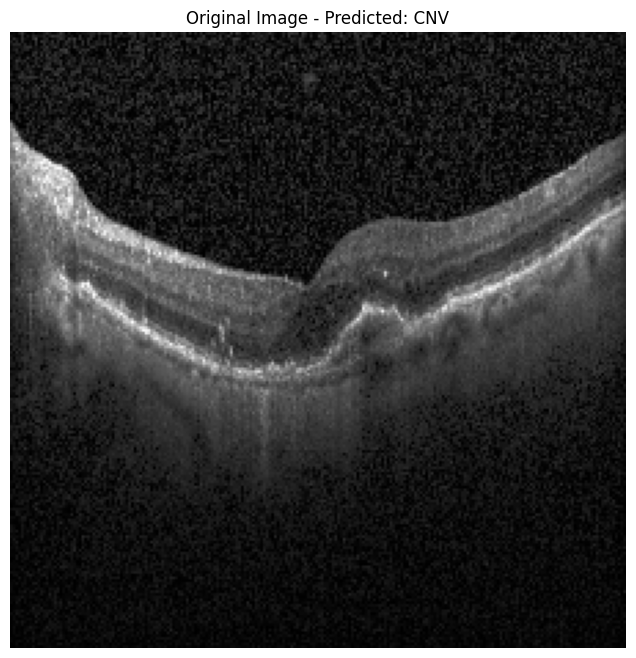

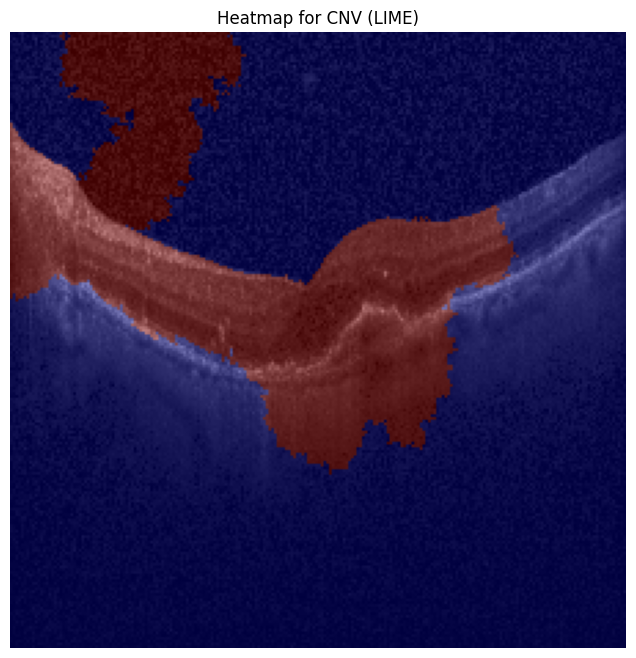

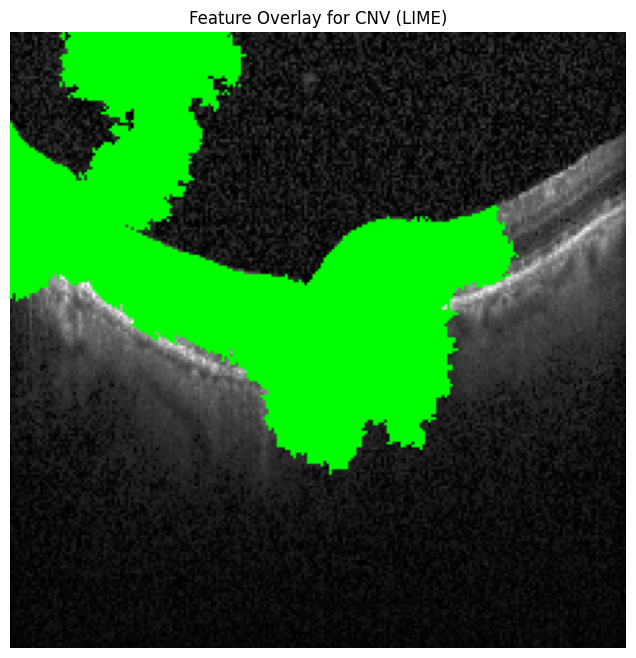

Predicted Class: CNV - LIME applied correctly.


In [26]:
import lime
from lime import lime_image
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import cv2

def explain_prediction_with_lime(model, image_path, class_labels):

   # Explains the model's prediction using LIME and visualizes feature importance
   # using heatmaps and transparent overlays for better interpretability.


    # Load grayscale image and convert to RGB for visualization
    original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if original_image is None:
        print(f"Error: Unable to read image at {image_path}")
        return
    original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_GRAY2RGB)  # Convert grayscale to 3-channel RGB
    original_image_resized = cv2.resize(original_image_rgb, (224, 224))

    # Preprocess the image for the model
    processed_image = preprocess_image(image_path)[0]

    explainer = lime_image.LimeImageExplainer()

    # Function wrapper for LIME predictions
    def model_predict_wrapper(images):
        processed_images = np.array([tf.keras.applications.efficientnet.preprocess_input(img) for img in images])
        return model.predict(processed_images)

    # Get model prediction
    predictions = model.predict(np.expand_dims(processed_image, axis=0))
    predicted_class = np.argmax(predictions, axis=-1)[0]
    predicted_label = class_labels[predicted_class]

    # Generate LIME explanation for the predicted class
    explanation = explainer.explain_instance(
        processed_image,
        model_predict_wrapper,
        top_labels=1,
        hide_color=0,
        num_samples=1000,
    )

    # Display original image
    plt.figure(figsize=(8, 8))
    plt.imshow(original_image_resized, cmap="gray")  # Display as grayscale
    plt.title(f"Original Image - Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()

    # Get feature importance mask
    temp, mask = explanation.get_image_and_mask(
        predicted_class,
        positive_only=True,
        num_features=10,
        hide_rest=False,
    )

    # Heatmap Visualization
    plt.figure(figsize=(8, 8))
    plt.imshow(original_image_resized, cmap="gray")  # Display original grayscale image
    plt.imshow(mask, cmap='jet', alpha=0.5)  # Overlay heatmap
    plt.title(f"Heatmap for {predicted_label} (LIME)")
    plt.axis('off')
    plt.show()

    # **Alternative: Transparent Overlay (Blended Features)**
    blended = np.copy(original_image_resized)
    blended[mask == 1] = (0, 255, 0)  # Highlight important areas in green

    plt.figure(figsize=(8, 8))
    plt.imshow(blended)  # Show the blended image
    plt.title(f"Feature Overlay for {predicted_label} (LIME)")
    plt.axis('off')
    plt.show()

    print(f"Predicted Class: {predicted_label} - LIME applied correctly.")

explain_prediction_with_lime(model, test_image, class_labels)
